In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [2]:
# Read mnist data from the mat file
mnist_data = scipy.io.loadmat("mnist2.mat")
imgs_train = mnist_data['imgs_train']
imgs_test = mnist_data['imgs_test']
labels_train = np.squeeze(mnist_data['labels_train'])
labels_test = np.squeeze(mnist_data['labels_test'])
d1,d2,N = np.shape(imgs_train)
d=d1

In [3]:
#prepare data--- 3, 8, 9 only
Itrain_3 = np.where(labels_train == 3)
Itrain_8 = np.where(labels_train == 8)
Itrain_9 = np.where(labels_train == 9)
Itest_3 = np.where(labels_test == 3)
Itest_8 = np.where(labels_test == 8)
Itest_9 = np.where(labels_test == 9)
imgs_train_3 = np.squeeze(imgs_train[:,:,Itrain_3])
imgs_train_8 = np.squeeze(imgs_train[:,:,Itrain_8])
imgs_train_9 = np.squeeze(imgs_train[:,:,Itrain_9])
imgs_test_3 = np.squeeze(imgs_test[:,:,Itest_3])
imgs_test_8 = np.squeeze(imgs_test[:,:,Itest_8])
imgs_test_9 = np.squeeze(imgs_test[:,:,Itest_9])
Ntrain_3 = np.size(Itrain_3)
Ntrain_8 = np.size(Itrain_8)
Ntrain_9 = np.size(Itrain_9)
Ntest_3 = np.size(Itest_3)
Ntest_8 = np.size(Itest_8)
Ntest_9 = np.size(Itest_9)
flat_imgs_train_3=imgs_train_3.reshape((d1*d2,Ntrain_3))
flat_imgs_train_8=imgs_train_8.reshape((d1*d2,Ntrain_8))
flat_imgs_train_9=imgs_train_9.reshape((d1*d2,Ntrain_9))
imgs_train=np.concatenate((flat_imgs_train_3,flat_imgs_train_8,flat_imgs_train_9),axis=1)
print(imgs_train.shape)

(400, 17931)


In [4]:
#within class means
mean_Itrain_3=np.mean(flat_imgs_train_3, axis=1)
mean_Itrain_8=np.mean(flat_imgs_train_8, axis=1)
mean_Itrain_9=np.mean(flat_imgs_train_9, axis=1)
print(mean_Itrain_3.shape)

(400,)


In [5]:
#Calculate Sw 
S3= np.zeros((d**2,d**2)) 
for i in range(Ntrain_3):
    S3 += np.outer(flat_imgs_train_3[:,i]-mean_Itrain_3, flat_imgs_train_3[:,i]-mean_Itrain_3)

S8 = np.zeros((d**2,d**2))
for i in range(Ntrain_8):
    S8 += np.outer(flat_imgs_train_8[:,i]-mean_Itrain_8, flat_imgs_train_8[:,i]-mean_Itrain_8)

S9 = np.zeros((d**2,d**2))
for i in range(Ntrain_9):
    S9 += np.outer(flat_imgs_train_9[:,i]-mean_Itrain_9, flat_imgs_train_9[:,i]-mean_Itrain_9)
    
Sw = S3 + S8 + S9
print(Sw.shape)

(400, 400)


In [6]:
#Calculate Sb
mean_Itrain_all=np.mean(imgs_train, axis=1) 
Sb3= Ntrain_3*np.outer(mean_Itrain_3-mean_Itrain_all,mean_Itrain_3-mean_Itrain_all) 
Sb8= Ntrain_8*np.outer(mean_Itrain_8-mean_Itrain_all,mean_Itrain_8-mean_Itrain_all)
Sb9= Ntrain_9*np.outer(mean_Itrain_9-mean_Itrain_all,mean_Itrain_9-mean_Itrain_all)
Sb = Sb3 + Sb8 + Sb9
print(Sb.shape)

(400, 400)


In [7]:
#solve the generalized eigenvalue problem, then project the data to a lower dimension
lam_sb, eig_sb  = scipy.linalg.eig(Sb,Sw) 
W = eig_sb[:,0:2] 
W = W.real
X3 = flat_imgs_train_3.T 
X8 = flat_imgs_train_8.T
X9 = flat_imgs_train_9.T

Y3 = X3 @ W
Y8 = X8 @ W
Y9 = X9 @ W
print(Y3.shape)

(6131, 2)


Text(0, 0.5, 'PCA 2')

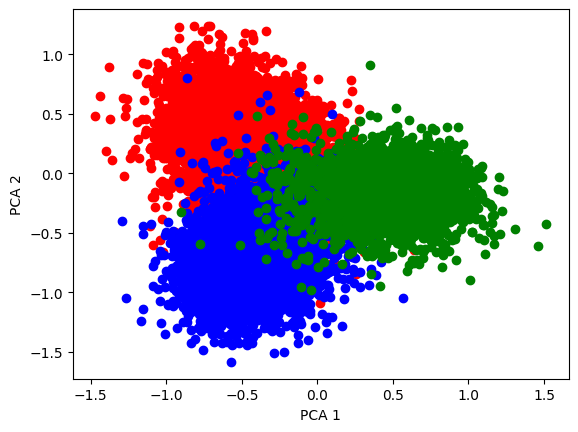

In [8]:
#plotting the 3 categories 
fig = plt.figure()
ax = fig.add_subplot()
# plt.rcParams.update({'font.size': 16})
plt.scatter(Y3[:,0],Y3[:,1],color = 'red',label = "3") 
plt.scatter(Y8[:,0],Y8[:,1],color = 'blue',label = "8")
plt.scatter(Y9[:,0],Y9[:,1],color = 'green',label = "9")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

In [9]:
# Use PCA to reduce the dimensionality to nPCA
NPCA = 2

dd = d1*d2
X3 = np.zeros((Ntrain_3,dd))
X8 = np.zeros((Ntrain_8,dd))
X9 = np.zeros((Ntrain_9,dd))
for j in range(Ntrain_3):
    img = np.squeeze(imgs_train_3[:,:,j])
    X3[j,:] = np.reshape(img,(dd,))
for j in range(Ntrain_8):
    img = np.squeeze(imgs_train_8[:,:,j])
    X8[j,:] = np.reshape(img,(dd,))
for j in range(Ntrain_9):
    img = np.squeeze(imgs_train_9[:,:,j])
    X9[j,:] = np.reshape(img,(dd,))
X = np.concatenate((X3,X8,X9),axis = 0)
print(np.shape(X))
U,S,Vtrans = np.linalg.svd(X,full_matrices = False)
print(f"U: {np.shape(U)}; S: {np.shape(S)}; Vtrans: {np.shape(Vtrans)}")
V = np.transpose(Vtrans)
Xtrain = np.matmul(X,V[:,:NPCA])
print(f"Xtrain: {np.shape(Xtrain)}")

(17931, 400)
U: (17931, 400); S: (400,); Vtrans: (400, 400)
Xtrain: (17931, 2)


Text(0, 0.5, 'PCA 2')

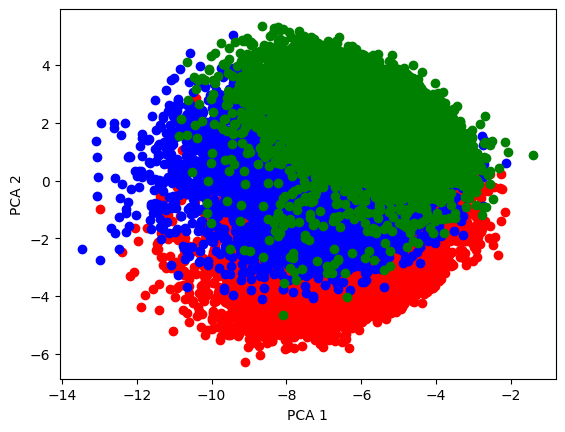

In [10]:
# Plot train data projected onto the first 2 PCAs
X3_3pca = np.matmul(X3,V[:,:NPCA])
X8_3pca = np.matmul(X8,V[:,:NPCA])
X9_3pca = np.matmul(X9,V[:,:NPCA])

fig = plt.figure()
ax = fig.add_subplot()
# plt.rcParams.update({'font.size': 16})
plt.scatter(X3_3pca[:,0],X3_3pca[:,1],color = 'red',label = "3")
plt.scatter(X8_3pca[:,0],X8_3pca[:,1],color = 'blue',label = "8")
plt.scatter(X9_3pca[:,0],X9_3pca[:,1],color = 'green',label = "9")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')


(17931, 400)
U: (17931, 400); S: (400,); Vtrans: (400, 400)
Xtrain: (17931, 3)


C:\Users\hengyiwu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 0.5, 'PCA 3')

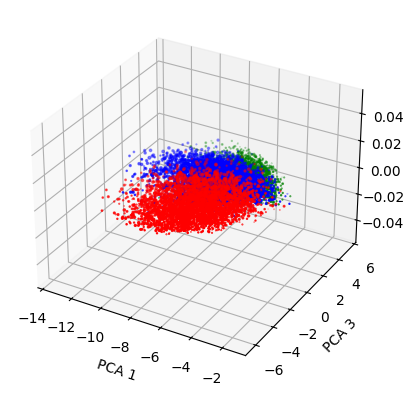

In [11]:
#Extra- plot first 3 PCAs in 3D
# Use PCA to reduce the dimensionality to nPCA
NPCA = 3

dd = d1*d2
X3 = np.zeros((Ntrain_3,dd))
X8 = np.zeros((Ntrain_8,dd))
X9 = np.zeros((Ntrain_9,dd))
for j in range(Ntrain_3):
    img = np.squeeze(imgs_train_3[:,:,j])
    X3[j,:] = np.reshape(img,(dd,))
for j in range(Ntrain_8):
    img = np.squeeze(imgs_train_8[:,:,j])
    X8[j,:] = np.reshape(img,(dd,))
for j in range(Ntrain_9):
    img = np.squeeze(imgs_train_9[:,:,j])
    X9[j,:] = np.reshape(img,(dd,))
X = np.concatenate((X3,X8,X9),axis = 0)
print(np.shape(X))
U,S,Vtrans = np.linalg.svd(X,full_matrices = False)
print(f"U: {np.shape(U)}; S: {np.shape(S)}; Vtrans: {np.shape(Vtrans)}")
V = np.transpose(Vtrans)
Xtrain = np.matmul(X,V[:,:NPCA])
print(f"Xtrain: {np.shape(Xtrain)}")

X3_3pca = np.matmul(X3,V[:,:NPCA])
X8_3pca = np.matmul(X8,V[:,:NPCA])
X9_3pca = np.matmul(X9,V[:,:NPCA])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(X3_3pca[:,0],X3_3pca[:,1], X3_3pca[:,2], color = 'red',label = "3")
plt.scatter(X8_3pca[:,0],X8_3pca[:,1], X8_3pca[:,2], color = 'blue',label = "8")
plt.scatter(X9_3pca[:,0],X9_3pca[:,1], X9_3pca[:,2], color = 'green',label = "9")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_ylabel('PCA 3')
